In [1]:
using CSV
using DataFrames
using Gadfly
import Cairo, Fontconfig

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1317


In [2]:
data_mms = DataFrame(CSV.File("mms_scale.csv"))

,objective,matrix_type,density,N,method,time,obj,ratio
,String,String,Missing,Int64,String,Float64,Float64,Float64
1,max,known,missing,5,mms,0.0741457,9945.5,0.941928
2,max,known,missing,10,mms,0.815618,78180.5,0.712816
3,max,known,missing,15,mms,9.14765,75173.0,0.749913
4,max,known,missing,20,mms,76.9093,1.53752e5,0.733435
5,max,known,missing,25,mms,600.948,396552.0,0.756013


In [3]:
data_ns = DataFrame(CSV.File("ns_scale.csv"))

,objective,matrix_type,density,N,method,time,obj,ratio
,String,String,Missing,Int64,String,Float64,Float64,Float64
1,max,known,missing,5,ns,0.107174,8572.0,0.925871
2,max,known,missing,10,ns,6.47175,71237.5,0.780222
3,max,known,missing,15,ns,79.7951,249840.0,0.780072
4,max,known,missing,20,ns,500.062,4.80764e5,0.773162
5,max,known,missing,25,ns,1932.12,284943.0,0.774459


In [4]:
defaultfont = "CMU Serif";
defaultfontstyle = (
    key_title_font = defaultfont,
    key_label_font = defaultfont,
    minor_label_font = defaultfont,
    major_label_font = defaultfont,
    key_title_font_size = 14px,
    key_label_font_size = 12px,
    minor_label_font_size = 14px,
    major_label_font_size = 14px,
);

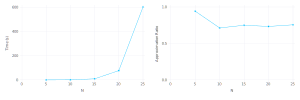

In [5]:
plt_mms_time = plot(
    data_mms,
    x = :N,
    y = :time,
    Geom.point,
    Geom.line,
    Guide.xlabel("N"),
    Guide.ylabel("Time (s)"),
    Coord.cartesian(ymin=0),
    style(;defaultfontstyle...),
)
plt_mms_ratio = plot(
    data_mms,
    x = :N,
    y = :ratio,
    Geom.point,
    Geom.line,
    Guide.xlabel("N"),
    Guide.ylabel("Approximation Ratio"),
    Coord.cartesian(ymin=0,ymax=1.0),
    style(;defaultfontstyle...),
)
plt_mms = hstack(plt_mms_time, plt_mms_ratio)
plt_mms |> SVG(30cm, 10cm)
plt_mms |> PDF("plt_mms.pdf", 30cm, 10cm)

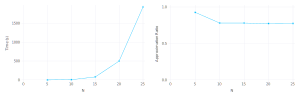

In [6]:
plt_ns_time = plot(
    data_ns,
    x = :N,
    y = :time,
    Geom.point,
    Geom.line,
    Guide.xlabel("N"),
    Guide.ylabel("Time (s)"),
    Coord.cartesian(ymin=0),
    style(;defaultfontstyle...),
)
plt_ns_ratio = plot(
    data_ns,
    x = :N,
    y = :ratio,
    Geom.point,
    Geom.line,
    Guide.xlabel("N"),
    Guide.ylabel("Approximation Ratio"),
    Coord.cartesian(ymin=0,ymax=1.0),
    style(;defaultfontstyle...),
)
plt_ns = hstack(plt_ns_time, plt_ns_ratio)
plt_ns |> SVG(30cm, 10cm)
plt_ns |> PDF("plt_ns.pdf", 30cm, 10cm)